<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Pregunta 1

<AxesSubplot:>

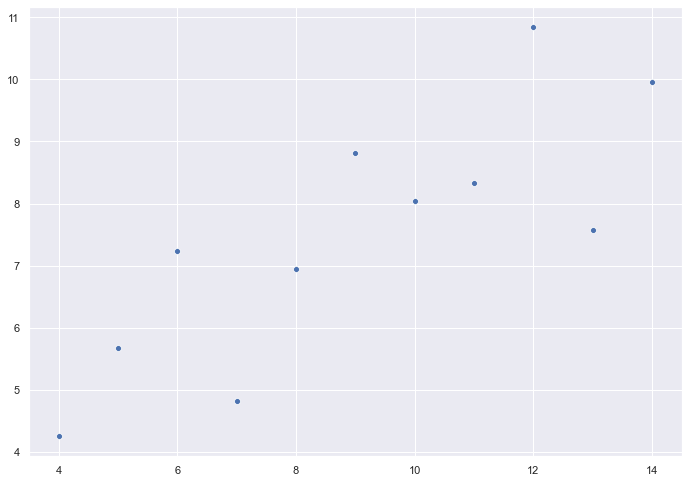

In [3]:
lx1=[]
ly1=[]
for i in range(len(df.grupo)):
    if df['grupo'][i]== 'Grupo_1':
        lx1.append(df['x'][i])
        ly1.append(df['y'][i])
sns.scatterplot(x=lx1, y=ly1)


<AxesSubplot:>

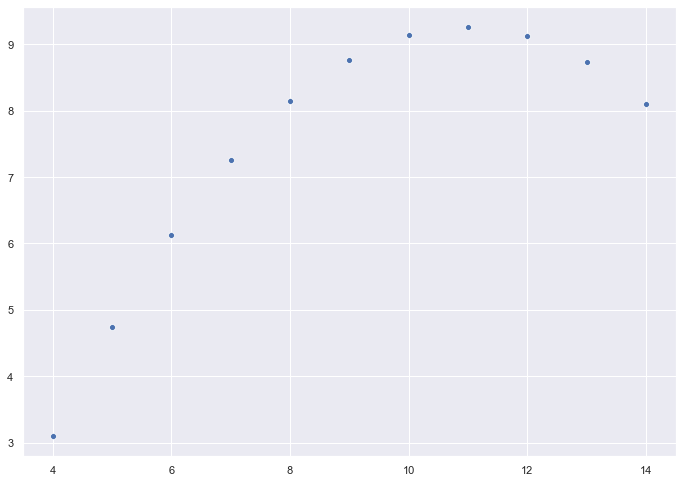

In [4]:
lx2=[]
ly2=[]
for i in range(len(df.grupo)):
    if df['grupo'][i]== 'Grupo_2':
        lx2.append(df['x'][i])
        ly2.append(df['y'][i])
sns.scatterplot(x=lx2, y=ly2)

<AxesSubplot:>

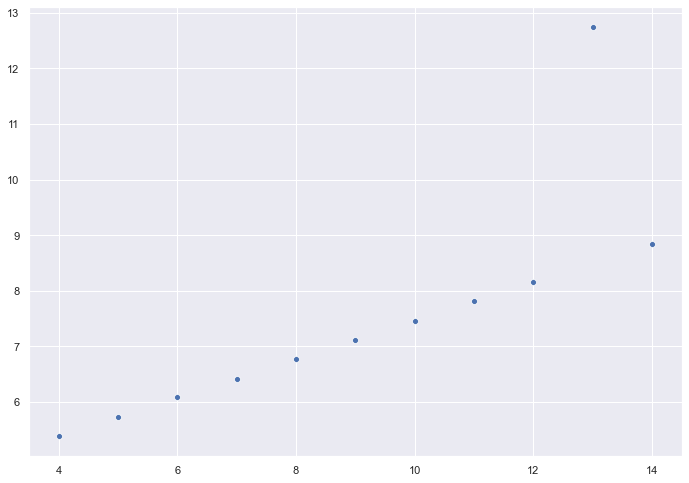

In [5]:
lx3=[]
ly3=[]
for i in range(len(df.grupo)):
    if df['grupo'][i]== 'Grupo_3':
        lx3.append(df['x'][i])
        ly3.append(df['y'][i])
sns.scatterplot(x=lx3, y=ly3)

<AxesSubplot:>

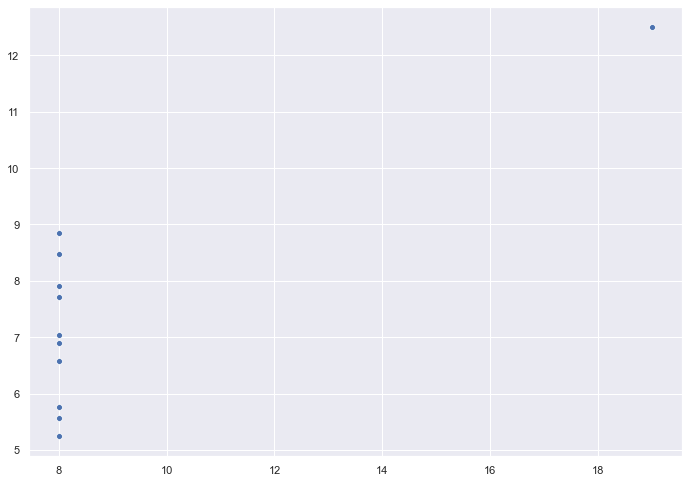

In [6]:
lx4=[]
ly4=[]       
for i in range(len(df.grupo)):
    if df['grupo'][i]== 'Grupo_4':
        lx4.append(df['x'][i])
        ly4.append(df['y'][i])
sns.scatterplot(x=lx4, y=ly4)

Los gráficos tienen distintos tipos de dispersión entre sus datos, 1,3 y 4 con tendencia lineal y 2 con datos distribuidos similarmente a una función cuadrada.

Pregunta 2

In [7]:
#Grupo1
g1=df.loc[:,'grupo']=='Grupo_1'
df_g1=df.loc[g1]
df_g1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [8]:
g2=df.loc[:,'grupo']=='Grupo_2'
df_g2=df.loc[g2]
df_g2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [9]:
g3=df.loc[:,'grupo']=='Grupo_3'
df_g3=df.loc[g3]
df_g3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [10]:
g4=df.loc[:,'grupo']=='Grupo_4'
df_g4=df.loc[g4]
df_g4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Pregunta 3

In [11]:
#Grupo 1
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_g1[['x']] # we only take the first two features.
y = df_g1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
LR1 = LinearRegression()
LR1.fit(df_g1[['x']],df_g1['y'])
beta_0 = round(LR1.intercept_,2)
beta_1 = round(LR1.coef_[0],2)


In [14]:
Y_prediction = LR1.predict(X_test)
Y_prediction

array([10.00136364,  8.001     ,  6.50072727])

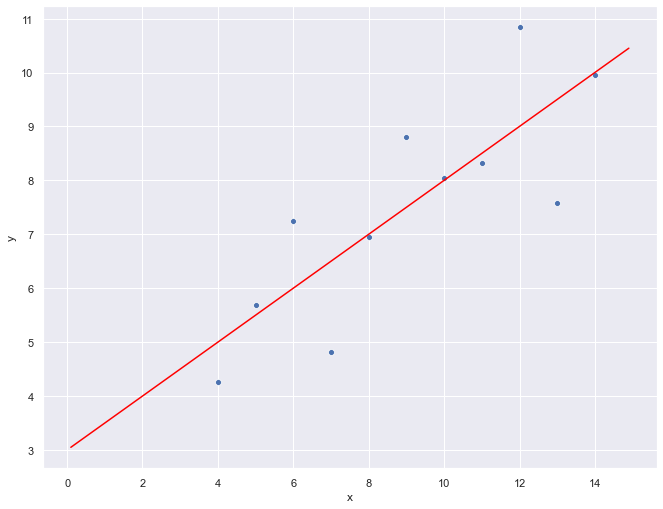

In [15]:
beta_0 = LR1.intercept_
beta_1 = LR1.coef_[0]
        
x_range = np.arange(0.1,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_1 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_1, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
#Grupo 2
X = df_g2[['x']] # we only take the first two features.
y = df_g2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
LR2 = LinearRegression()
LR2.fit(df_g2[['x']],df_g2['y'])
beta_0 = round(LR2.intercept_,2)
beta_1 = round(LR2.coef_[0],2)

In [18]:
Y_prediction = LR2.predict(X_test)
Y_prediction

array([10.00090909,  8.00090909,  6.50090909])

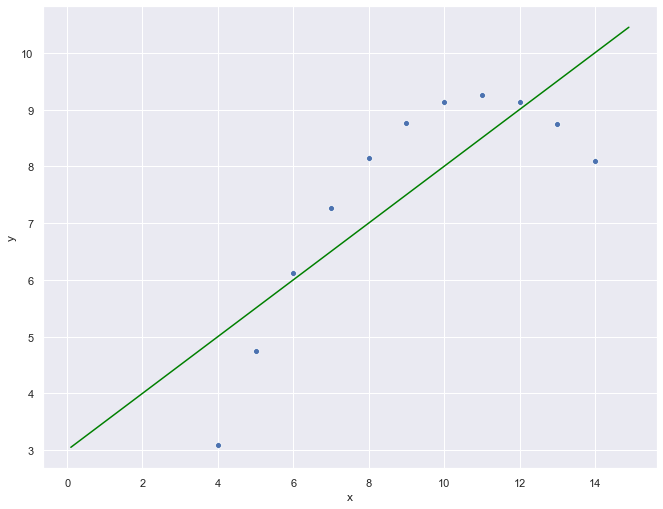

In [19]:
beta_0 = LR2.intercept_
beta_1 = LR2.coef_[0]
        
x_range = np.arange(0.1,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_2 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x',
                y='y_true',
                data=df_2, 
                ax=ax)

sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="green")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
#Grupo 3
X = df_g3[['x']] 
y = df_g3['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
LR3 = LinearRegression()
LR3.fit(df_g3[['x']],df_g3['y'])
beta_0 = round(LR3.intercept_,2)
beta_1 = round(LR3.coef_[0],2)

In [22]:
Y_prediction = LR3.predict(X_test)
Y_prediction

array([9.99863636, 7.99972727, 6.50054545])

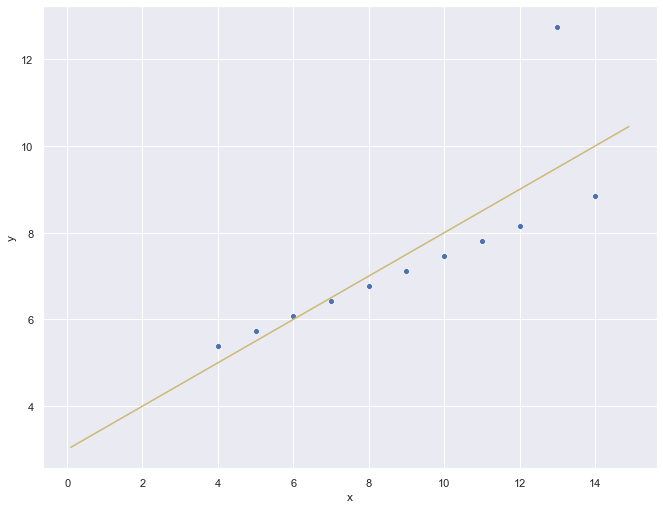

In [23]:
beta_0 = LR3.intercept_
beta_1 = LR3.coef_[0]
        
x_range = np.arange(0.1,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_2 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x',
                y='y_true',
                data=df_2, 
                ax=ax)

sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="y")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
#Grupo4
X = df_g4[['x']] 
y = df_g4['y']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
LR4 = LinearRegression()
LR4.fit(df_g4[['x']],df_g4['y'])
beta_0 = round(LR4.intercept_,2)
beta_1 = round(LR4.coef_[0],2)

In [46]:
Y_prediction = LR4.predict(X_test)
Y_prediction

array([6.50109091, 7.001     ])

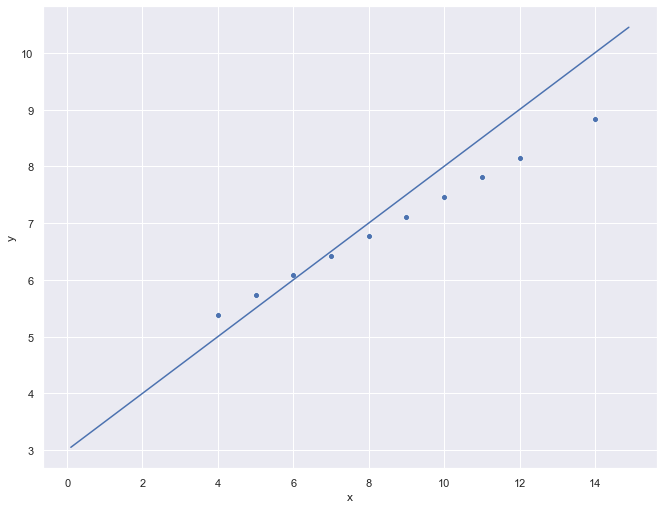

In [47]:
beta_0 = LR4.intercept_
beta_1 = LR4.coef_[0]
        
x_range = np.arange(0.1,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_2 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x',
                y='y_true',
                data=df_2, 
                ax=ax)

sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="b")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Basado en las gráficas, es posible ver que, en cuanto a la gráfio 1 existe una tendencia lineal de los datos. Respecto a 2, evidentemente la regresión lineal no se ajusta a la tendencia de los datos, los cuales se rigen por una dispersión cuadrática. En 3, la tendencia es lineal, solo que hay un elemento sucio que inclina la recta en dirección al eje y. En cuanto a 4, la tendencia es vertical a lo largo de la recta x=8 existiendo un dato sucio que inclina la recta sobre el eje x.

PREGUNTA 4

In [29]:
#Grupo 1
from metrics_regression import *
from sklearn.metrics import r2_score
df_temp_1 = pd.DataFrame(
    {
        'y':df_g1['y'],
        'yhat': LR1.predict(df_g1[['x']])
        }
)

df_metrics_1 = summary_metrics(df_temp_1)
df_metrics_1['r2'] =  round(r2_score(df_g1['y'], LR1.predict(df_g1[['x']])),4)
print(df_metrics_1)

      mae     mse    rmse    mape  maape   wmape   mmape   smape      r2
0  0.8374  1.2512  1.1185  0.1213  0.119  0.1116  0.1048  0.1167  0.6665


In [30]:
#Grupo 2
df_temp_2 = pd.DataFrame(
    {
        'y':df_g2['y'],
        'yhat': LR2.predict(df_g2[['x']])
        }
)

df_metrics_2 = summary_metrics(df_temp_2)
df_metrics_2['r2'] =  round(r2_score(df_g2['y'], LR2.predict(df_g2[['x']])),4)
print(df_metrics_2)

      mae     mse    rmse   mape   maape  wmape   mmape   smape      r2
0  0.9679  1.2524  1.1191  0.157  0.1504  0.129  0.1315  0.1438  0.6662


In [31]:
#grupo 3
df_temp_3 = pd.DataFrame(
    {
        'y':df_g3['y'],
        'yhat': LR3.predict(df_g3[['x']])
        }
)

df_metrics_3 = summary_metrics(df_temp_3)
df_metrics_3['r2'] =  round(r2_score(df_g3['y'], LR3.predict(df_g3[['x']])),4)
print(df_metrics_3)

     mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.716  1.2506  1.1183  0.0797  0.0791  0.0955  0.0712  0.0814  0.6663


In [48]:
#grupo 4
df_temp_4 = pd.DataFrame(
    {
        'y':df_g4['y'],
        'yhat': LR4.predict(df_g4[['x']])
        }
)

df_metrics_4 = summary_metrics(df_temp_4)
df_metrics_4['r2'] =  round(r2_score(df_g4['y'], LR4.predict(df_g4[['x']])),4)
print(df_metrics_4)

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.9027  1.2493  1.1177  0.1347  0.1324  0.1203  0.1167  0.1303  0.6667


En cuanto a las métricas, es posible verificar que la tendencia lineal representa de buena forma la dispersión de los datos, dado que su coeficiente de relalción, si bien ronda el valor 0,6, refleja una concordancia entre la recta entregada por la regresión y la tendencia de los datos. Este difiere de la interpretación obtenida de los gráficos en el inciso n°4.

PREGUNTA 5

En el grupo 1 no se tocará ya que dado la gráfica en 3 y las métricas en 4, se comporta de buena manera a una tendencia lineal. En 3 y 4 quitaremos los datos que se alejan de la linea de tendencia y veremos que sucede.

In [41]:
#se borran datos sucios
df_g3_2=df_g3.drop([24])
df_g4_2=df_g4.drop([40])

In [50]:
#Nuevo 3
X = df_g3_2[['x']] 
y = df_g3_2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
LR3_2 = LinearRegression()
LR3_2.fit(df_g3_2[['x']],df_g3_2['y'])
beta_0 = round(LR3_2.intercept_,2)
beta_1 = round(LR3_2.coef_[0],2)

In [54]:
Y_prediction = LR3_2.predict(X_test)
Y_prediction

array([6.42337662, 6.76876623])

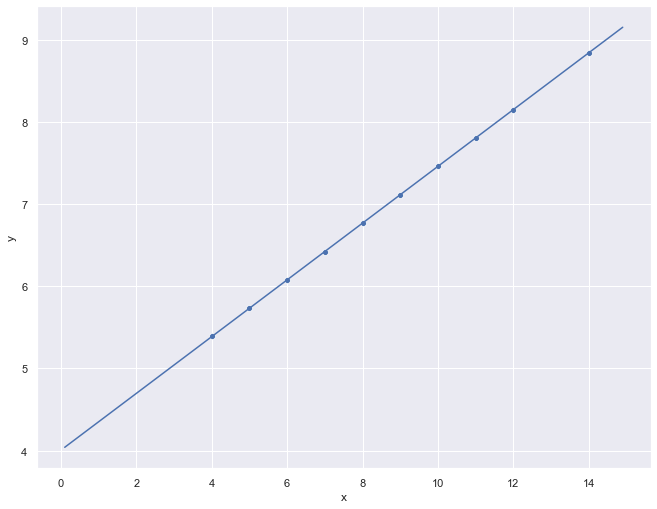

In [55]:
beta_0 = LR3_2.intercept_
beta_1 = LR3_2.coef_[0]
        
x_range = np.arange(0.1,15,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df_3_2 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x',
                y='y_true',
                data=df_3_2, 
                ax=ax)

sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="b")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [56]:
#metricas
df_temp_3_2 = pd.DataFrame(
    {
        'y':df_g3_2['y'],
        'yhat': LR3_2.predict(df_g3_2[['x']])
        }
)

df_metrics_3_2 = summary_metrics(df_temp_3_2)
df_metrics_3_2['r2'] =  round(r2_score(df_g3_2['y'], LR3_2.predict(df_g3_2[['x']])),4)
print(df_metrics_3_2)

      mae  mse    rmse    mape   maape   wmape   mmape   smape   r2
0  0.0023  0.0  0.0028  0.0003  0.0003  0.0003  0.0003  0.0003  1.0


<AxesSubplot:xlabel='x', ylabel='y'>

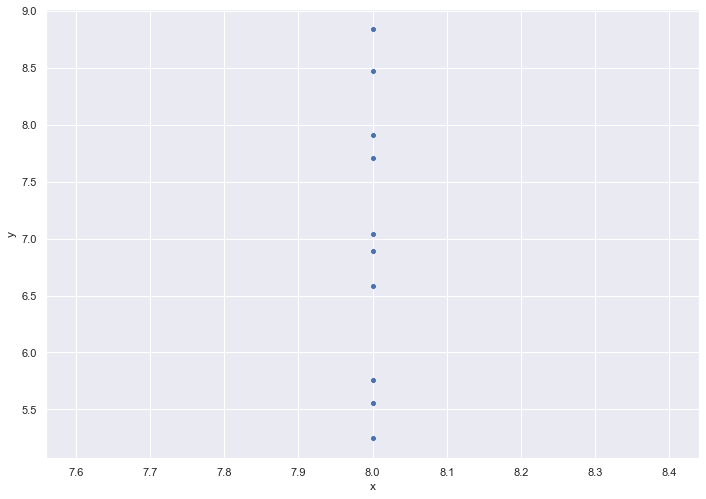

In [63]:
#gráfica 4 nuevo
sns.scatterplot(x='x', y='y', data=df_g4_2)

Notamos que al quitar el dato sucio a grupo 3, la linea de tendencia de los datos es perfecta lo cual queda demostrado tanto gráficamente como en las metricas, donde R^2 es igual a 1. En tanto, con respecto a grupo 4, es trivial notar que la tendencia de los datos sigue la recta x=8. Con respecto a grupo 2, es posible ajustar el modelo a uno cuadrático, dado que a distribución de los datos tiende a ser parabólica